<img src="sklearn.PNG">

## I.Standart Scaler

In [1]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 10., -10.,  20.],
                    [ 20.,  0.,  0.  ],
                    [ 0.,  10., -10.]])

In [2]:
X_train.std()

10.657403385139377

In [3]:
X_train.mean()

4.444444444444445

In [4]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [5]:
X_transformed = scaler.transform(X_train)
X_transformed

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [6]:
X_train.std()

10.657403385139377

In [7]:
X_transformed.std()

1.0

In [8]:
X_train.mean(axis=0)

array([10.        ,  0.        ,  3.33333333])

In [9]:
X_transformed.mean(axis=0)

array([0., 0., 0.])

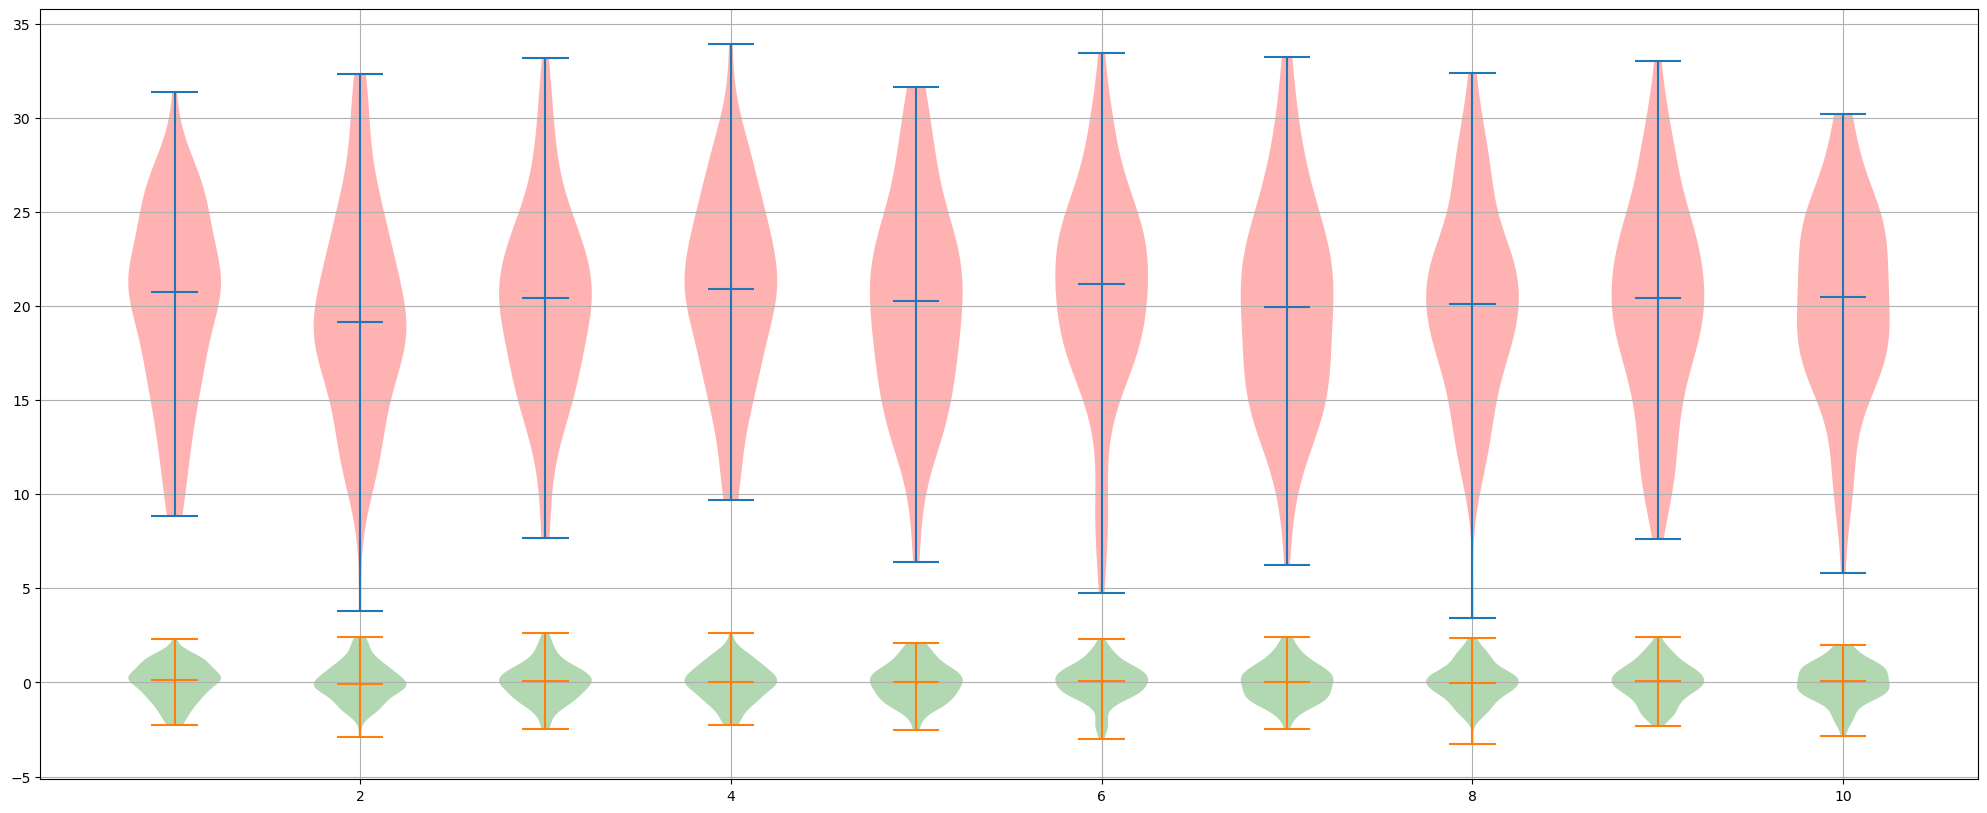

In [10]:
"""
Возьмем сэмпл побольше
"""
import matplotlib.pyplot as plt
sample = np.random.randn(100,10)*5 + 20

plt.figure(figsize=(25,10))
plt.grid()
violin_parts = plt.violinplot(sample[:,:], showmedians=True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    
scaled_sample = preprocessing.StandardScaler().fit_transform(sample)

violin_parts = plt.violinplot(scaled_sample[:,:], showmedians=True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('green')

## II Scaling to a range

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [12]:
min_max_scaler = preprocessing.MinMaxScaler((-5, 5))
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[ 0.        , -5.        ,  5.        ],
       [ 5.        ,  0.        , -1.66666667],
       [-5.        ,  5.        , -5.        ]])

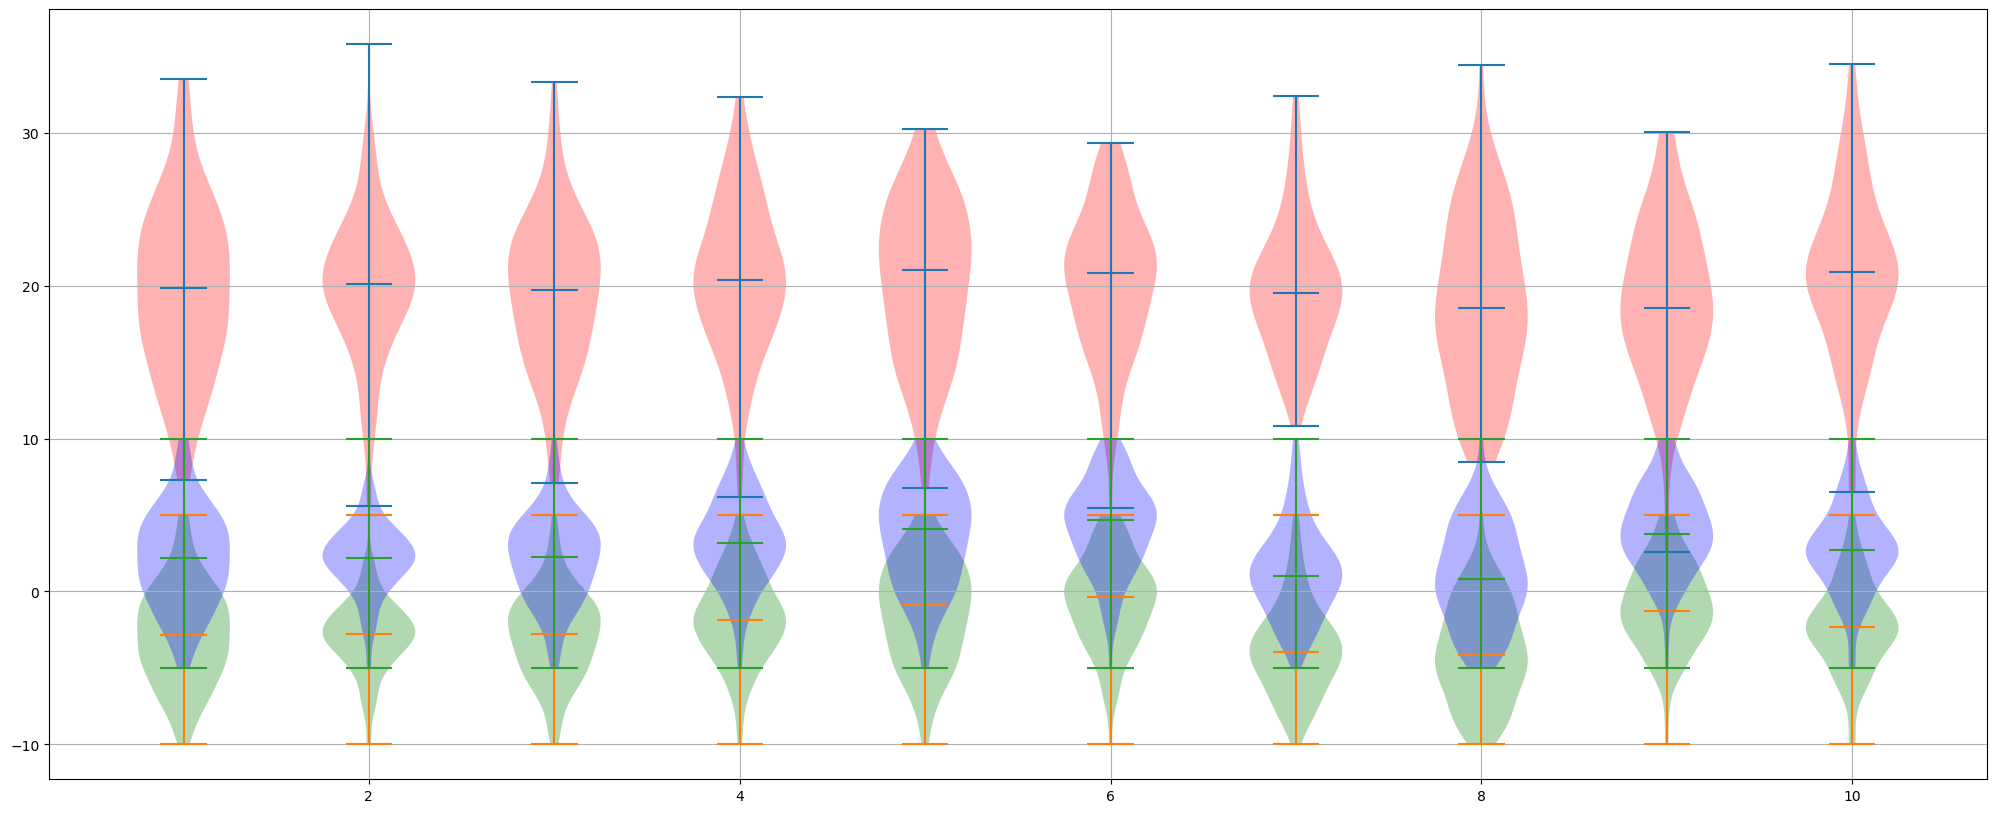

In [13]:
import matplotlib.pyplot as plt
sample = np.random.randn(100,10)*5 + 20

plt.figure(figsize=(25,10))
plt.grid()
violin_parts = plt.violinplot(sample[:,:], showmedians=True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    
scaled_sample_1 = preprocessing.MinMaxScaler((-10,5)).fit_transform(sample)
scaled_sample_2 = preprocessing.MinMaxScaler((-5,10)).fit_transform(sample)

violin_parts = plt.violinplot(scaled_sample_1[:,:], showmedians=True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('green')
    
violin_parts = plt.violinplot(scaled_sample_2[:,:], showmedians=True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('blue')    

## III Mapping to a Uniform distribution

In [14]:
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)

In [15]:
sample = np.random.randn(100,10)

In [16]:
sample_transformed = quantile_transformer.fit_transform(sample)

C:\Users\dboy\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(


In [17]:
quantiles = np.arange(100)

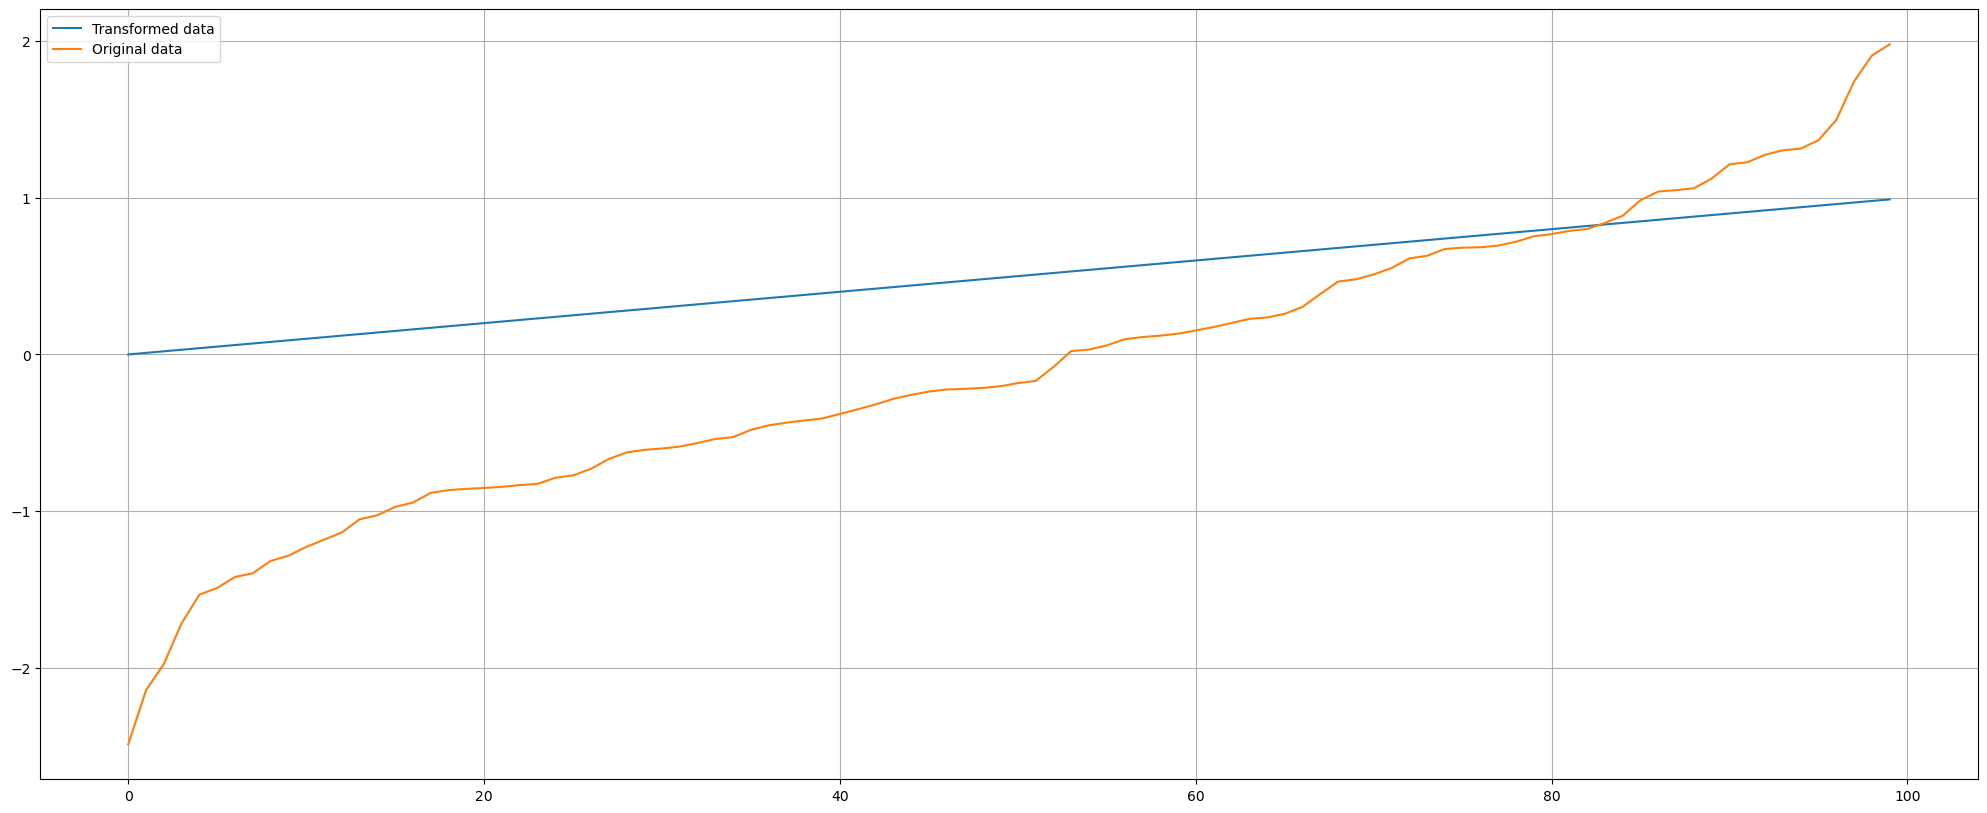

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plt.grid()

plt.plot(quantiles, np.percentile(sample_transformed[:,0], quantiles), label='Transformed data')
plt.plot(quantiles, np.percentile(sample[:,0], quantiles), label = 'Original data')
plt.legend()

## Or normal

In [19]:
quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)

In [20]:
sample = np.random.triangular(0,1,3,size=(10000,10))

In [21]:
sample_transformed = quantile_transformer.fit_transform(sample)

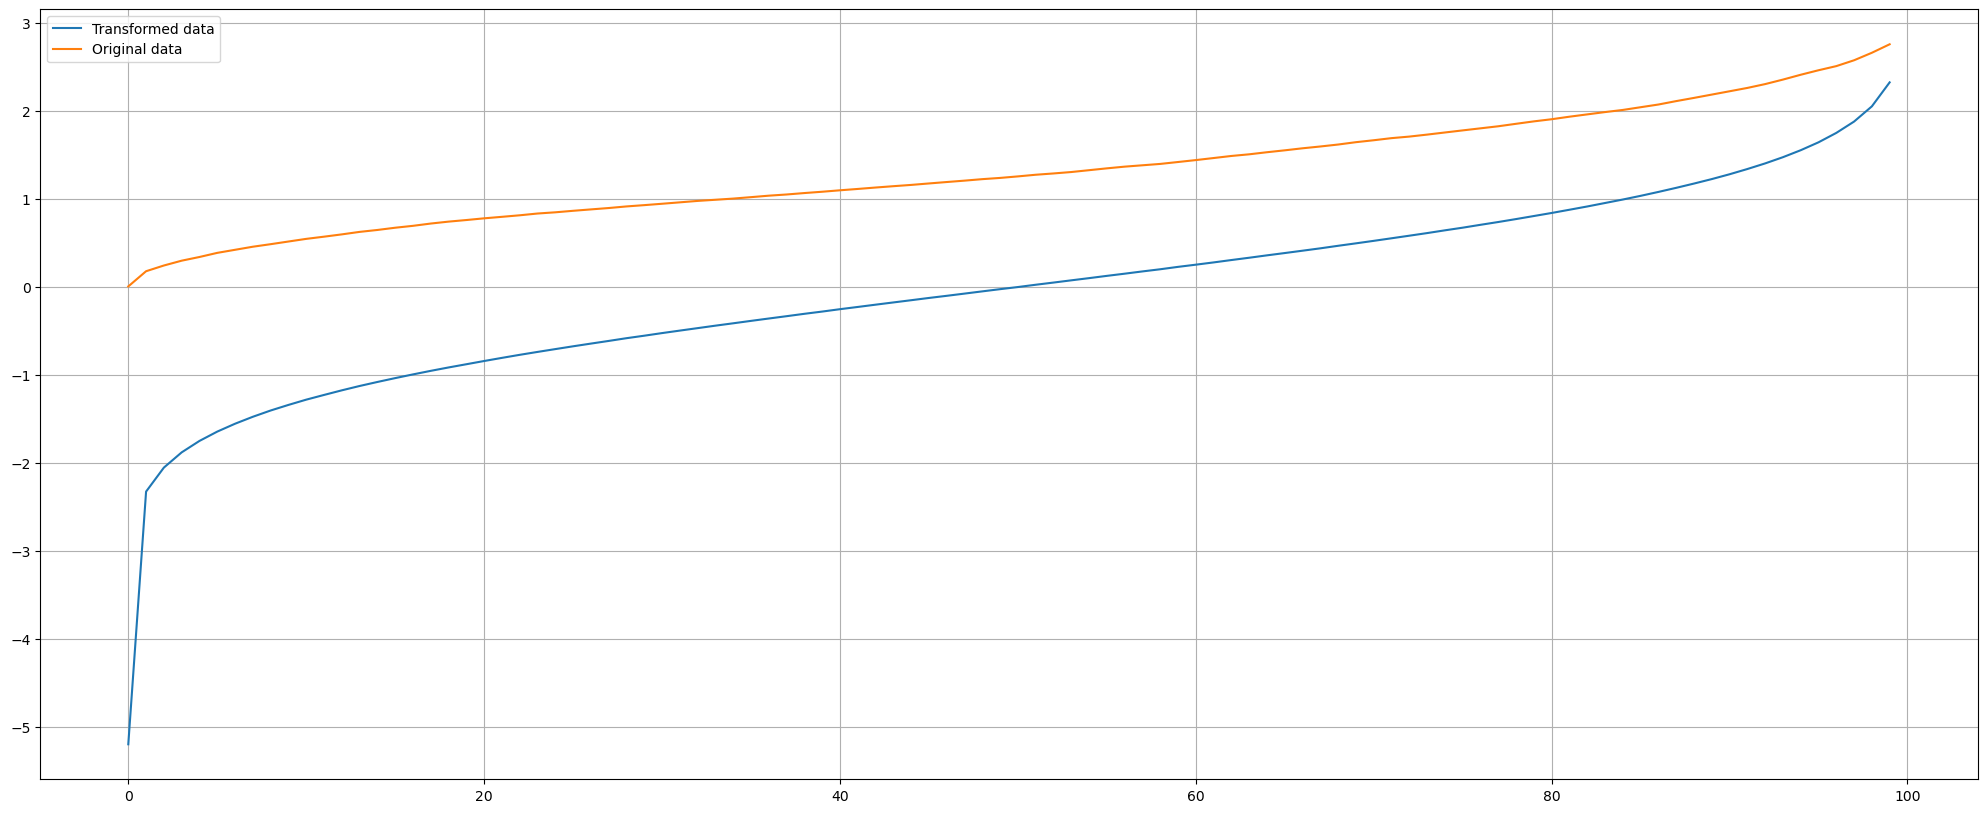

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plt.grid()

plt.plot(quantiles, np.percentile(sample_transformed[:,0], quantiles), label='Transformed data')
plt.plot(quantiles, np.percentile(sample[:,0], quantiles), label = 'Original data')
plt.legend()

{'bodies': [<matplotlib.collections.PolyCollection at 0x18ed3b79a10>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x18ed42d3390>,
 'cmins': <matplotlib.collections.LineCollection at 0x18ed433a8d0>,
 'cbars': <matplotlib.collections.LineCollection at 0x18ed3b44490>}

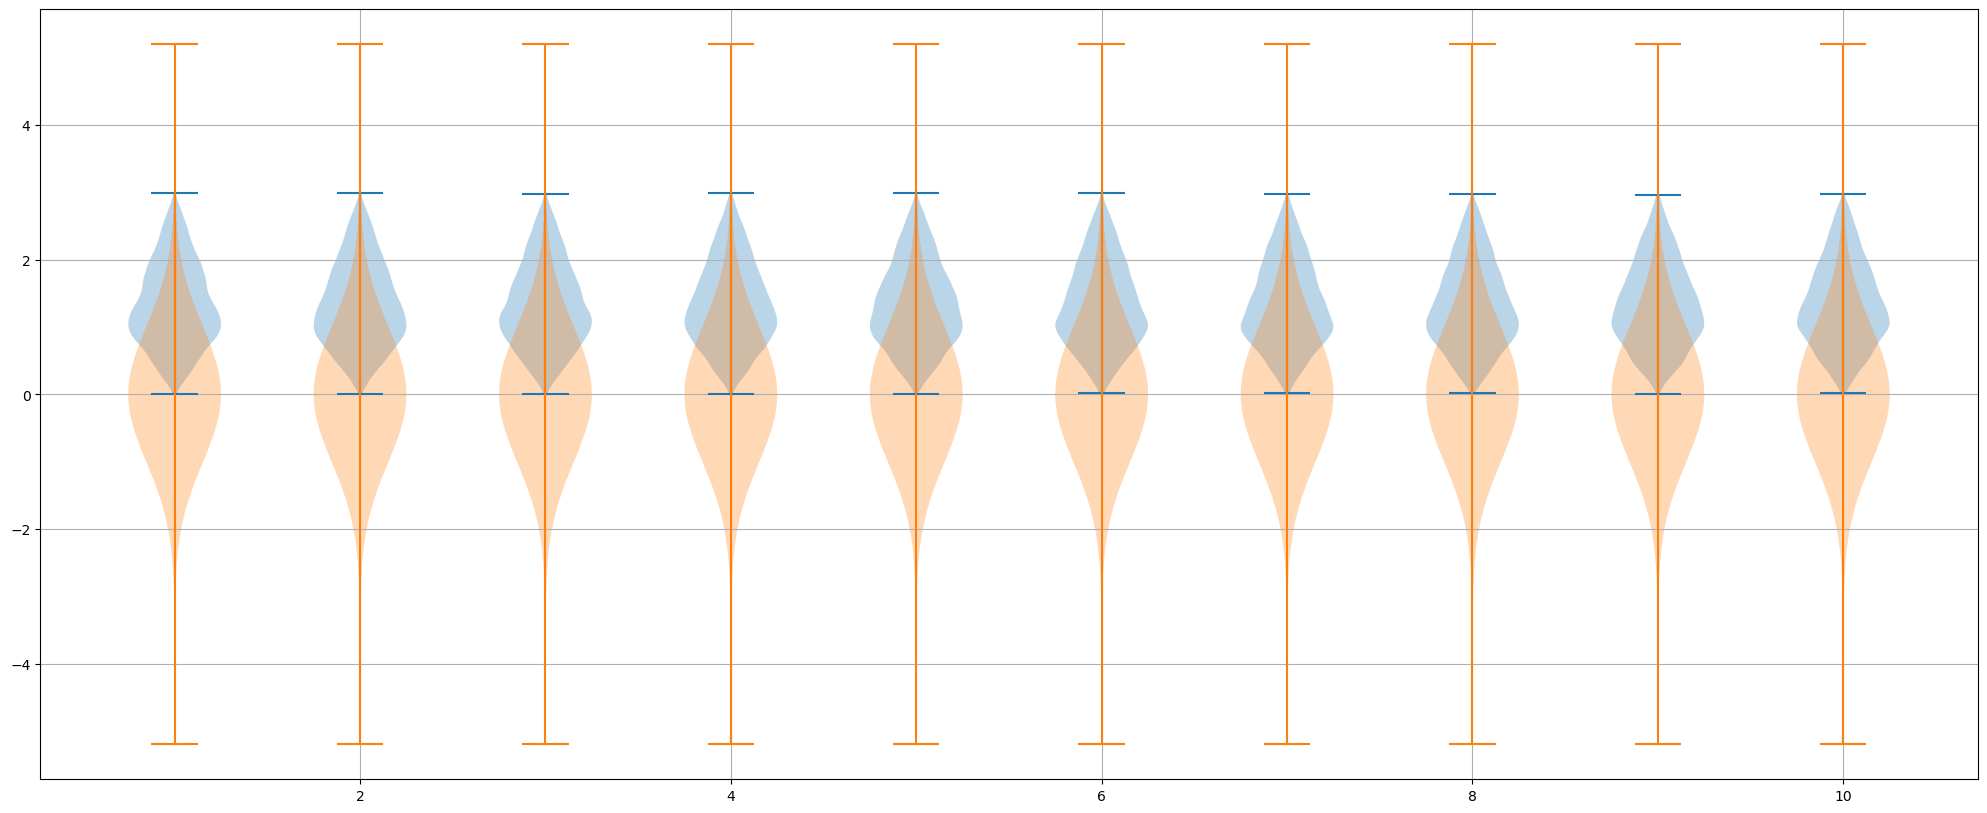

In [25]:
plt.figure(figsize=(25,10))
plt.grid()
plt.violinplot(sample)
plt.violinplot(sample_transformed)

## IV Normalize

{'bodies': [<matplotlib.collections.PolyCollection at 0x18ed43bf150>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x18ed431b8d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x18ed43d8d10>,
 'cbars': <matplotlib.collections.LineCollection at 0x18ed4351f50>}

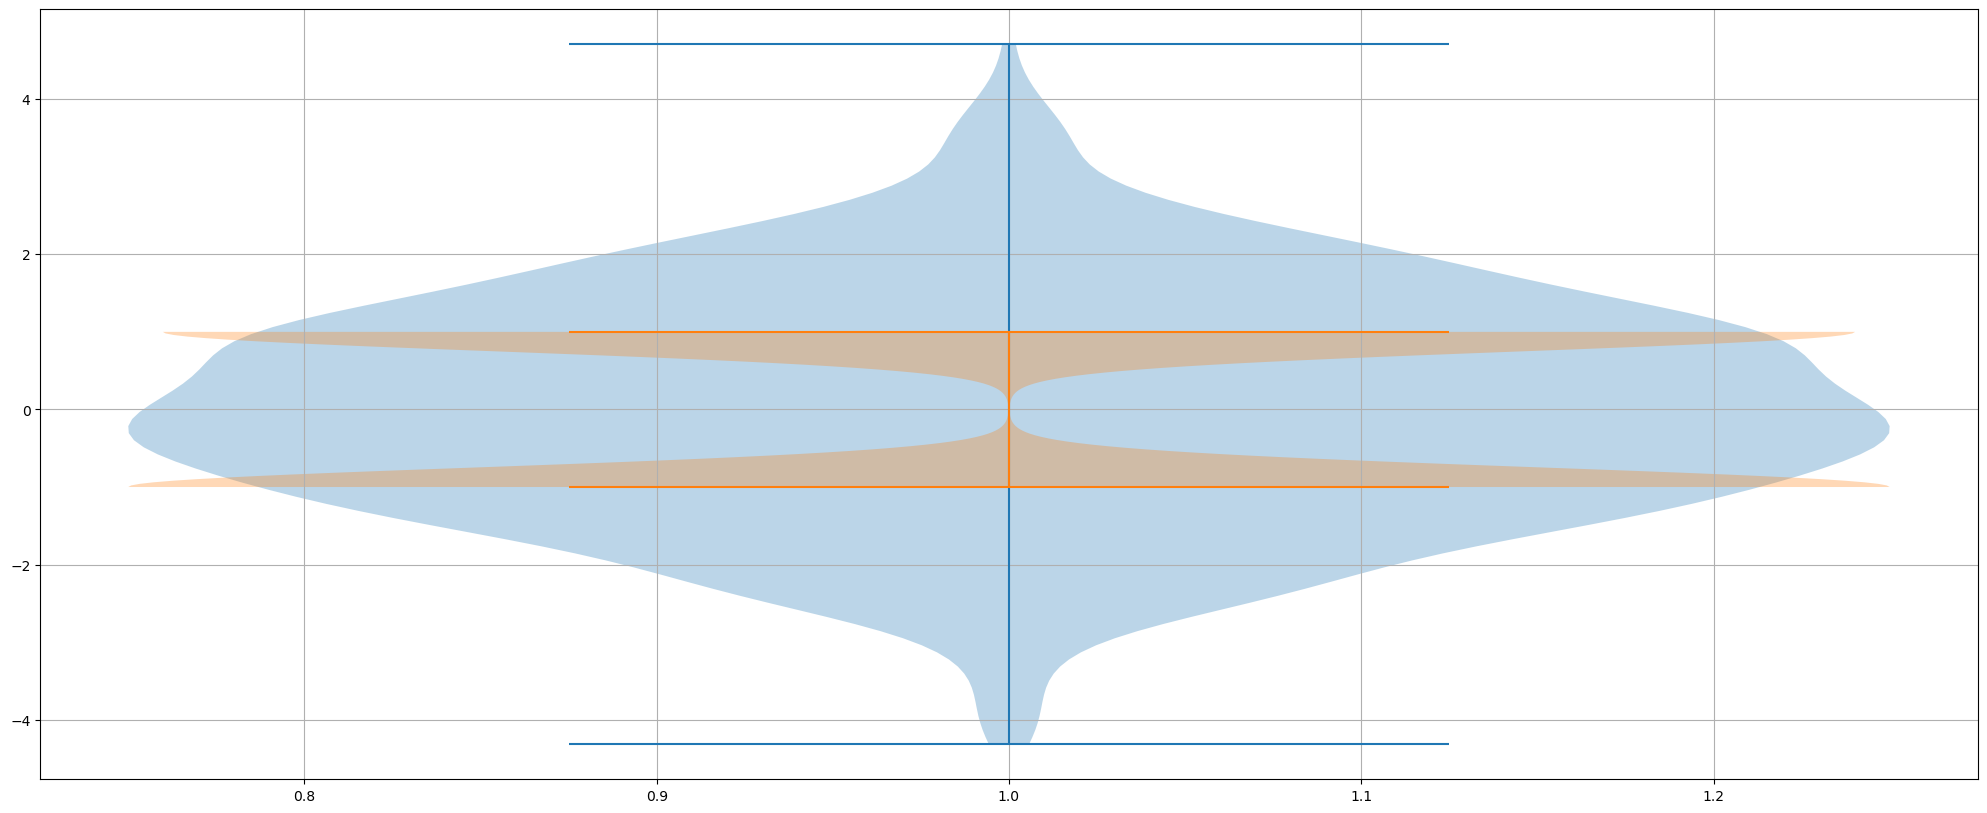

In [26]:
X = np.random.randn(1000,1)*1.5
normalizer_l2 = preprocessing.Normalizer(norm='l2').fit(X)
normalizer_l1 = preprocessing.Normalizer(norm='l1').fit(X)
X_norm_l2 = normalizer_l2.transform(X)
X_norm_l1 = normalizer_l1.transform(X)
plt.figure(figsize=(25,10))
plt.grid()
plt.violinplot(X)
plt.violinplot(X_norm_l2)
#plt.violinplot(X_norm_l1)

{'bodies': [<matplotlib.collections.PolyCollection at 0x18ed44f3650>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x18ed44ffe10>,
 'cmins': <matplotlib.collections.LineCollection at 0x18ed4414dd0>,
 'cbars': <matplotlib.collections.LineCollection at 0x18ed432de10>}

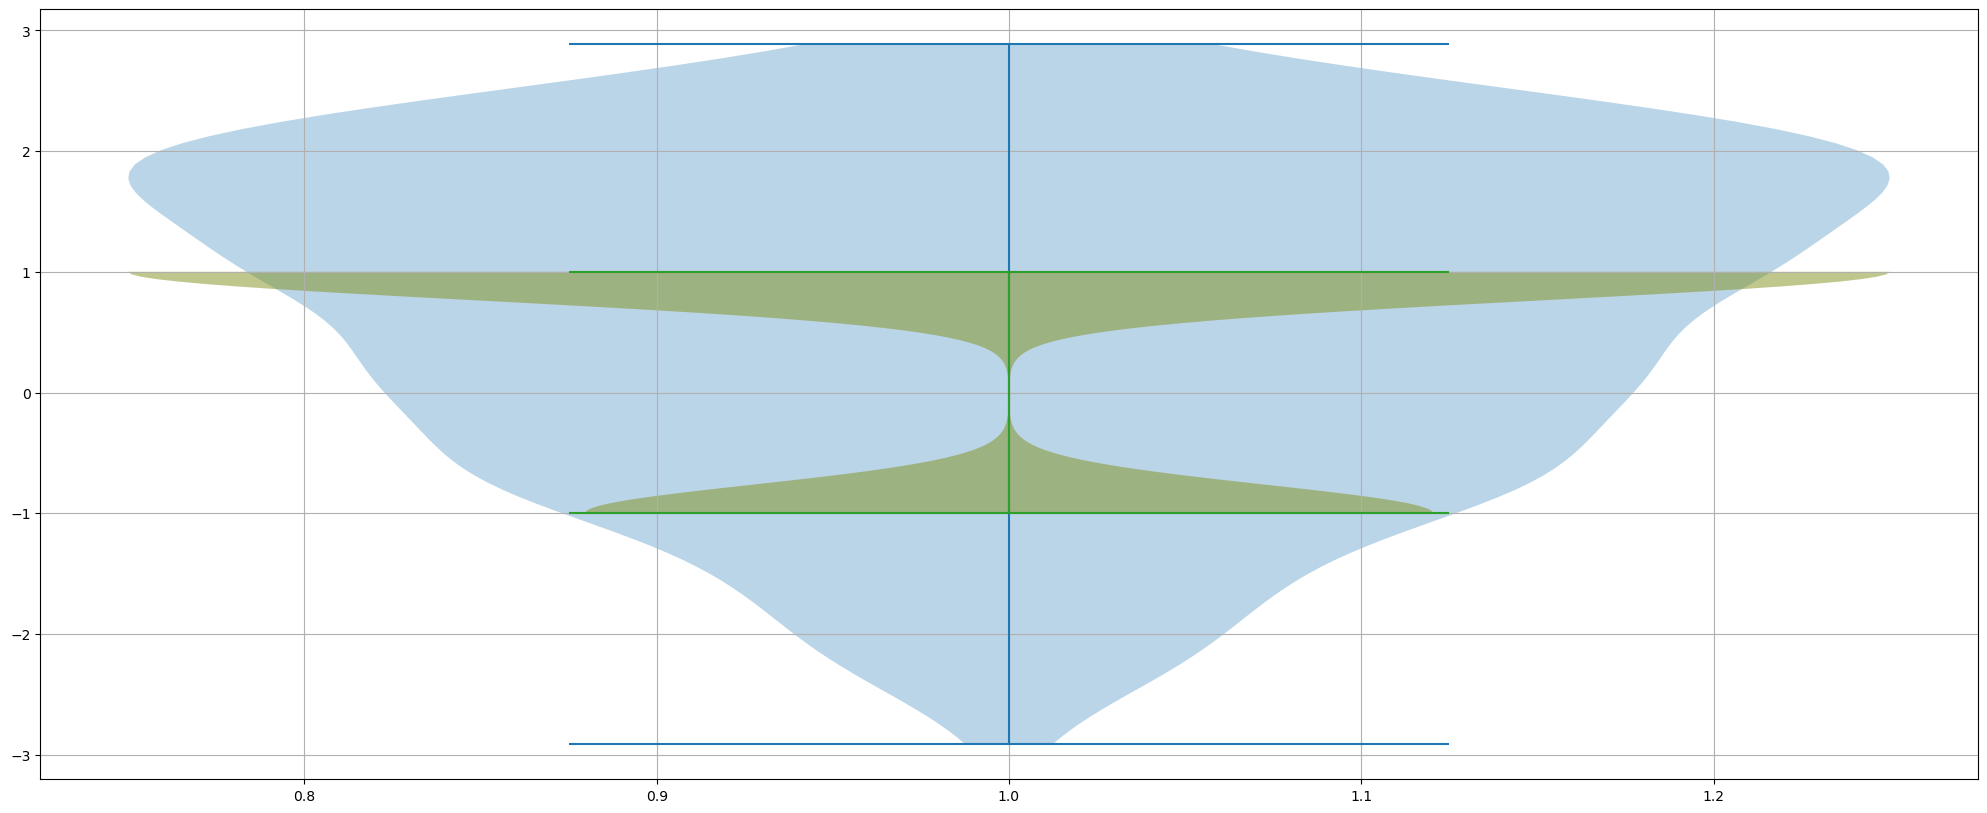

In [28]:
X = np.random.triangular(-3,2,3,size=(1000,1))#*1.5
normalizer_l2 = preprocessing.Normalizer(norm='l2').fit(X)
normalizer_l1 = preprocessing.Normalizer(norm='l1').fit(X)
X_norm_l2 = normalizer_l2.transform(X)
X_norm_l1 = normalizer_l1.transform(X)
plt.figure(figsize=(25,10))
plt.grid()
plt.violinplot(X)
plt.violinplot(X_norm_l2)
plt.violinplot(X_norm_l1)

## V Train test split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_full = np.array([[[x,y] for y in np.linspace(-np.sqrt(9 - x**2), np.sqrt(9 - x**2),50)] for x in np.arange(-3,3,0.01)])

In [31]:
X_full.shape

(600, 50, 2)

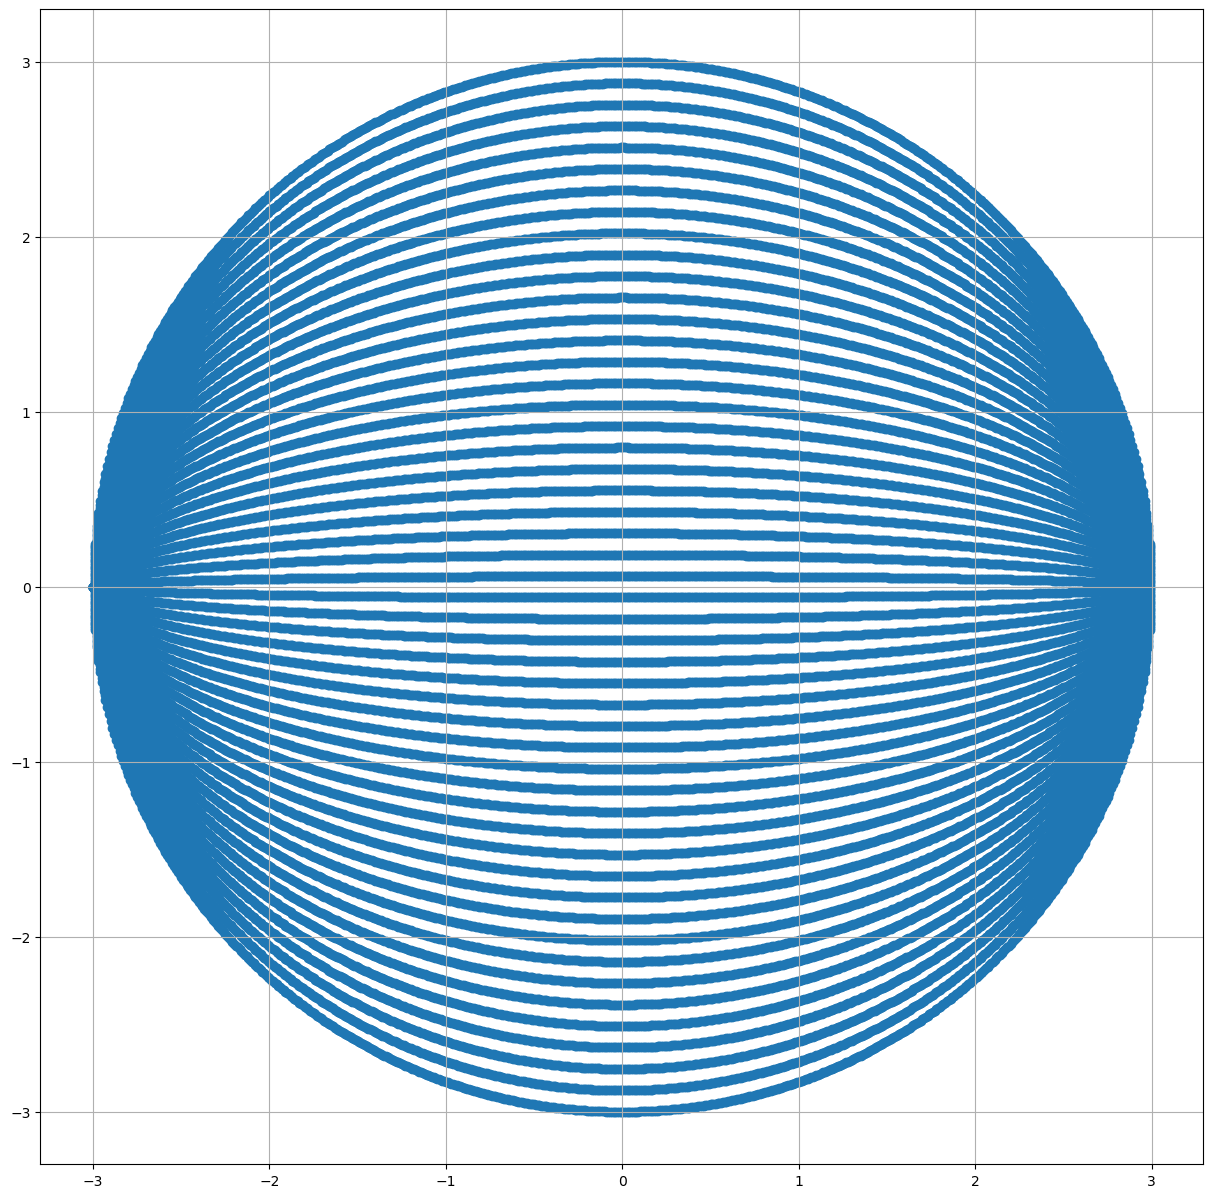

In [32]:
plt.figure(figsize=(15,15))
plt.grid()
plt.scatter(X_full.reshape(-1,2)[:,0], X_full.reshape(-1,2)[:,1])

In [33]:
X_train, x_test,y_train , y_test = train_test_split(X_full, X_full, test_size=0.2, shuffle=False)

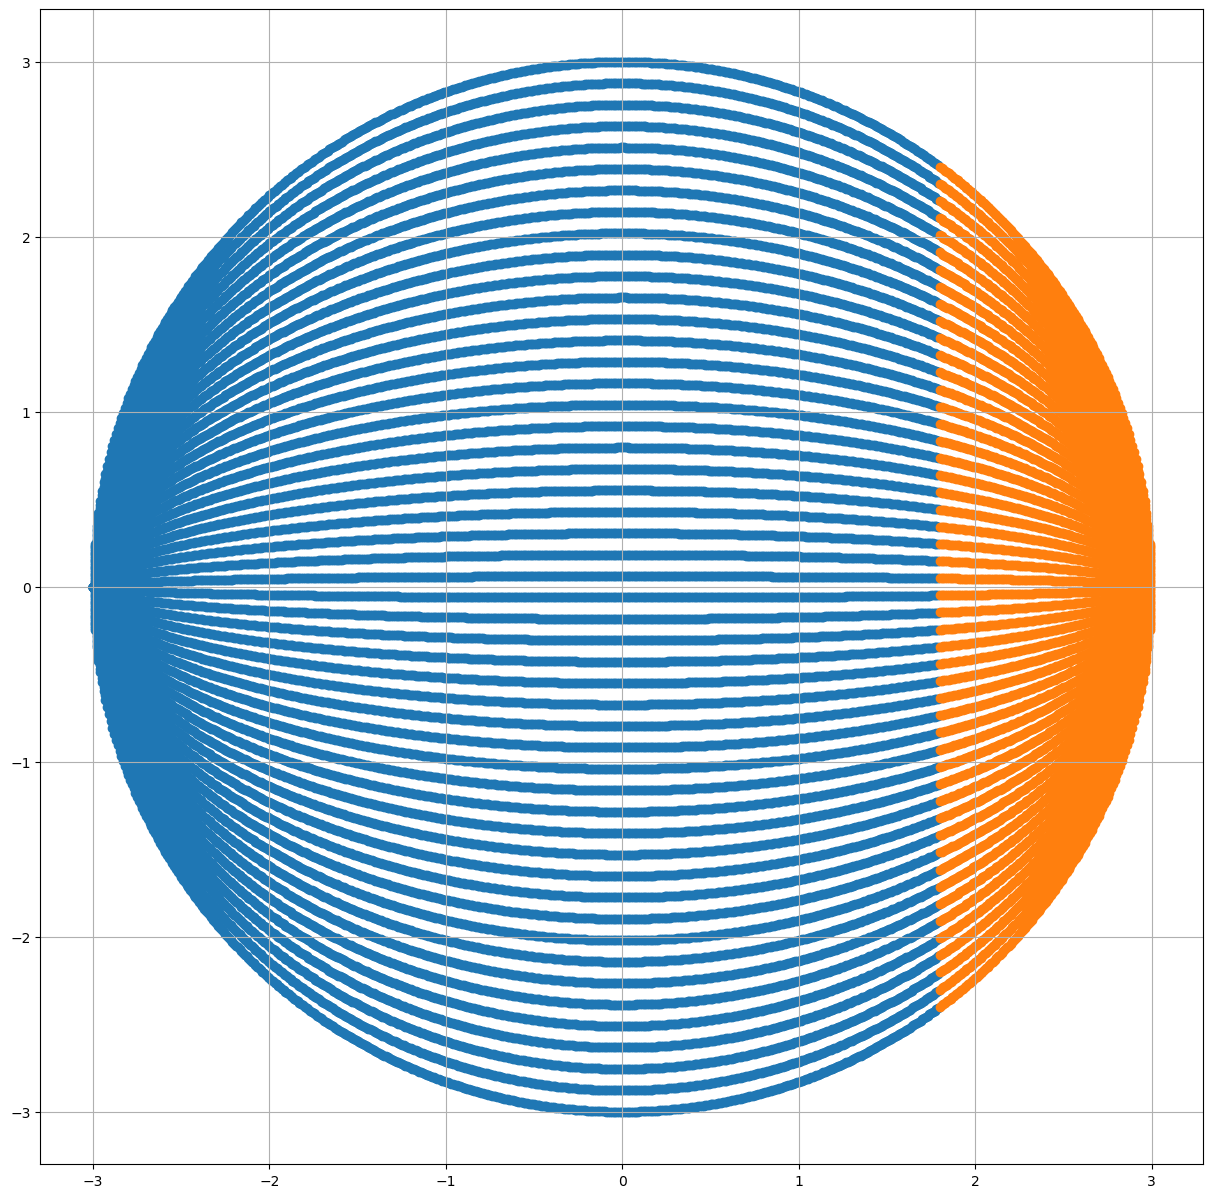

In [34]:
plt.figure(figsize=(15,15))
plt.grid()
plt.scatter(X_train.reshape(-1,2)[:,0], X_train.reshape(-1,2)[:,1])
plt.scatter(x_test.reshape(-1,2)[:,0], x_test.reshape(-1,2)[:,1])

In [37]:
X_train, x_test,y_train , y_test = train_test_split(X_full, X_full, test_size=0.2, shuffle=True)

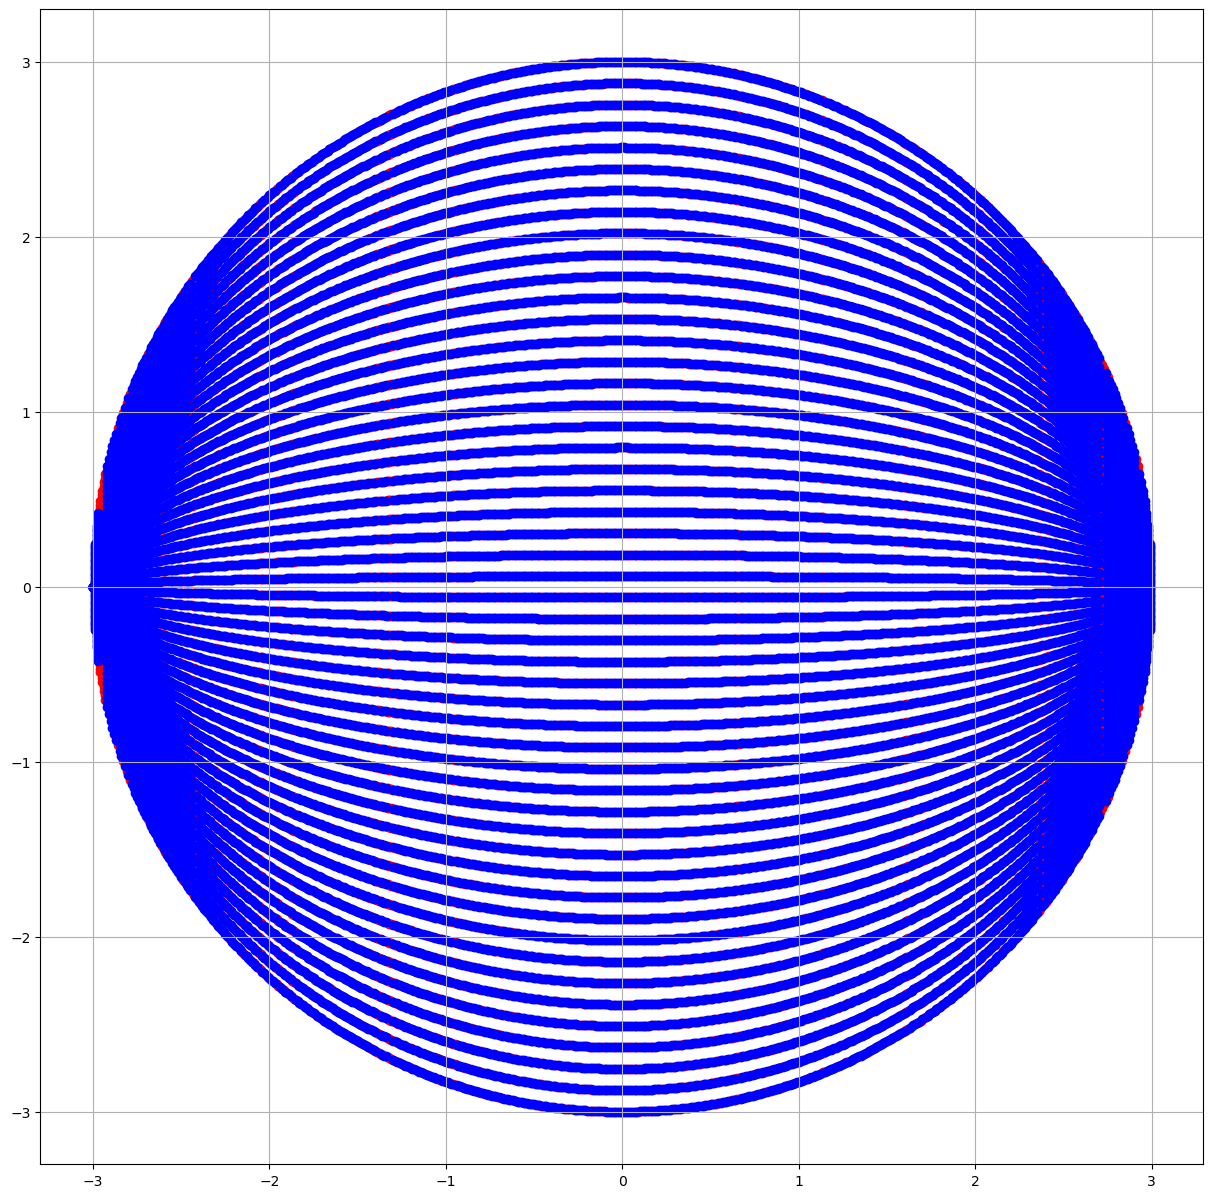

In [38]:
plt.figure(figsize=(15,15))
plt.grid()


plt.scatter(x_test.reshape(-1,2)[:,0], x_test.reshape(-1,2)[:,1], c='r')
plt.scatter(X_train.reshape(-1,2)[:,0], X_train.reshape(-1,2)[:,1], c='b')